![](files/images/EscUpmPolit_p.gif "UPM")

# Course Notes for Learning Intelligent Systems

Department of Telematic Engineering Systems, Universidad Politécnica de Madrid, © Carlos A. Iglesias

## [Introduction to Machine Learning](2_0_0_Intro_ML.ipynb)

# Table of Contents
* [Decision Tree Learning](#Decision-Tree-Learning)
* [Load data and preprocessing](#Load-data-and-preprocessing)
* [Train classifier](#Train-classifier)
* [Evaluating the algorithm](#Evaluating-the-algorithm)
	* [Precision, recall and f-score](#Precision,-recall-and-f-score)
	* [Confusion matrix](#Confusion-matrix)
	* [K-Fold cross validation](#K-Fold-cross-validation)
* [References](#References)

# Decision Tree Learning

The goal of this notebook is to learn how to create a classification object using a [decision tree learning algorithm](https://en.wikipedia.org/wiki/Decision_tree_learning). 

There are a number of well known machine learning algorithms for decision tree learning, such as ID3, C4.5, C5.0 and CART. The scikit-learn uses an optimised version of the [CART (Classification and Regression Trees) algorithm](https://en.wikipedia.org/wiki/Predictive_analytics#Classification_and_regression_trees).

This notebook will follow the same steps that the previous notebook for learning using the [kNN Model](2_5_1_kNN_Model.ipynb), and details some peculiarities of the decision tree algorithms.

You need to install pydotplus: `conda install pydotplus` for the visualization.

## Load data and preprocessing

Here we repeat the same operations for loading data and preprocessing than in the previous notebooks.

In [2]:
# library for displaying plots
import matplotlib.pyplot as plt
# display plots in the notebook 
%matplotlib inline

## First, we repeat the load and preprocessing steps

# Load data
from sklearn import datasets
iris = datasets.load_iris()

# Training and test spliting
from sklearn.model_selection import train_test_split

x_iris, y_iris = iris.data, iris.target
# Test set will be the 25% taken randomly
x_train, x_test, y_train, y_test = train_test_split(x_iris, y_iris, test_size=0.25, random_state=33)

# Preprocess: normalize
from sklearn import preprocessing
scaler = preprocessing.StandardScaler().fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

## Train classifier

The usual steps for creating a classifier are:
1. Create classifier object
2. Call *fit* to train the classifier
3. Call *predict* to obtain predictions

*DecisionTreeClassifier* is capable of both binary (where the labels are [-1, 1]) classification and multiclass (where the labels are [0, ..., K-1]) classification.

In [3]:
from sklearn.tree import DecisionTreeClassifier
import numpy as np

from sklearn import tree

max_depth=3
random_state=1

# Create decision tree model
model = tree.DecisionTreeClassifier(max_depth=max_depth, random_state=random_state)

# Train the model using the training sets
model.fit(x_train, y_train) 

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=1, splitter='best')

In [4]:
print("Prediction ", model.predict(x_train))
print("Expected ", y_train)

Prediction  [1 0 1 1 1 0 0 1 0 2 0 0 1 2 0 1 2 2 1 1 0 0 2 0 0 2 1 1 2 2 2 2 0 0 1 1 0
 1 2 1 2 0 2 0 1 0 2 1 0 2 2 0 0 2 0 0 0 2 2 0 1 0 1 0 1 1 1 1 1 0 1 0 1 2
 0 0 0 0 2 2 0 1 1 2 1 0 0 2 1 1 0 1 1 0 2 1 2 1 2 0 1 0 0 0 2 1 2 1 2 1 2
 0]
Expected  [1 0 1 1 1 0 0 1 0 2 0 0 1 2 0 1 2 2 1 1 0 0 2 0 0 2 1 1 2 2 2 2 0 0 1 1 0
 1 2 1 2 0 2 0 1 0 2 1 0 2 2 0 0 2 0 0 0 2 2 0 1 0 1 0 1 1 1 1 1 0 1 0 1 2
 0 0 0 0 2 2 0 1 1 2 1 0 0 1 1 1 0 1 1 0 2 2 2 1 2 0 1 0 0 0 2 1 2 1 2 1 2
 0]


Alternatively, the probability of each class can be predicted, which is the fraction of training samples of the same class in a leaf:

In [5]:
# Print the 
print("Predicted probabilities", model.predict_proba(x_train[:10]))

Predicted probabilities [[0.         0.97368421 0.02631579]
 [1.         0.         0.        ]
 [0.         0.97368421 0.02631579]
 [0.         0.97368421 0.02631579]
 [0.         0.97368421 0.02631579]
 [1.         0.         0.        ]
 [1.         0.         0.        ]
 [0.         0.97368421 0.02631579]
 [1.         0.         0.        ]
 [0.         0.         1.        ]]


In [6]:
# Evaluate Accuracy in training

from sklearn import metrics
y_train_pred = model.predict(x_train)
print("Accuracy in training", metrics.accuracy_score(y_train, y_train_pred))

Accuracy in training 0.9821428571428571


In [7]:
# Now we evaluate error in testing
y_test_pred = model.predict(x_test)
print("Accuracy in testing ", metrics.accuracy_score(y_test, y_test_pred))

Accuracy in testing  0.9210526315789473


Now we are going to visualize the DecisionTree classification. It will plot the decision boundaries for each class.

The current version of pydot does not work well in Python 3.
For obtaining an image, you need to install `pip install pydotplus` and then `conda install graphviz`.

You can skip this example. Since it can require installing additional packages, we include here the result.
![Decision Tree](files/images/cart.png)

In [8]:
from IPython.display import Image 
from sklearn.externals.six import StringIO
import pydotplus as pydot

dot_data = StringIO()  
tree.export_graphviz(model, out_file=dot_data,  
                         feature_names=iris.feature_names,  
                         class_names=iris.target_names,  
                         filled=True, rounded=True,  
                         special_characters=True)  


graph = pydot.graph_from_dot_data(dot_data.getvalue()) 
graph.write_png('iris-tree.png')
Image(graph.create_png())  

ModuleNotFoundError: No module named 'pydotplus'

Here we show a graph of the decision tree boundaries. For each pair of iris features, the decision tree learns decision boundaries made of combinations of simple thresholding rules inferred from the training samples.

We are going to import a function defined in the file [util_ds.py](files/util_ds.py) using the *magic command* **%run**.

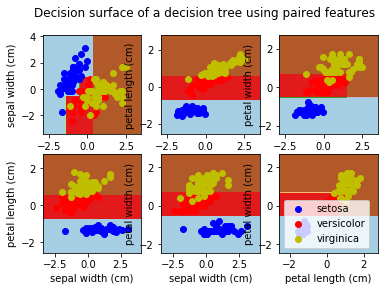

In [9]:
%run util_ds

# display plots in the notebook 
%matplotlib inline
plot_tree_iris()

Next we are going to export the pseudocode of the the learnt decision tree.

In [10]:
%run util_ds
get_code(model, iris.feature_names, iris.target_names)

if ( petal width (cm) <= -0.4170892909169197 ) {
    return setosa ( 42 examples )
}
else {
    if ( petal width (cm) <= 0.8618243038654327 ) {
        if ( petal length (cm) <= 0.818588137626648 ) {
            return versicolor ( 37 examples )
            return virginica ( 1 examples )
        }
        else {
            return versicolor ( 1 examples )
            return virginica ( 2 examples )
        }
    }
    else {
        if ( petal length (cm) <= 0.7074586153030396 ) {
            return versicolor ( 1 examples )
        }
        else {
            return virginica ( 28 examples )
        }
    }
}


<Figure size 432x288 with 0 Axes>

We can also obtain the feature importance of the fitted model as follows.

In [11]:
print(iris.feature_names)
print(model.feature_importances_)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
[0.         0.         0.05947455 0.94052545]


We see that the most important feature for this classifier is `petal width`.

## Evaluating the algorithm

### Precision, recall and f-score

For evaluating classification algorithms, we usually calculate three metrics: precision, recall and F1-score

* **Precision**: This computes the proportion of instances predicted as positives that were correctly evaluated (it measures how right our classifier is when it says that an instance is positive).
* **Recall**: This counts the proportion of positive instances that were correctly evaluated (measuring how right our classifier is when faced with a positive instance).
* **F1-score**: This is the harmonic mean of precision and recall, and tries to combine both in a single number.

In [12]:
print(metrics.classification_report(y_test, y_test_pred,target_names=iris.target_names))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00         8
  versicolor       0.79      1.00      0.88        11
   virginica       1.00      0.84      0.91        19

    accuracy                           0.92        38
   macro avg       0.93      0.95      0.93        38
weighted avg       0.94      0.92      0.92        38



### Confusion matrix

Another useful metric is the confusion matrix

In [13]:
print(metrics.confusion_matrix(y_test, y_test_pred))

[[ 8  0  0]
 [ 0 11  0]
 [ 0  3 16]]


We see we classify well all the 'setosa' and 'versicolor' samples. 

### K-Fold cross validation

In order to avoid bias in the training and testing dataset partition, it is recommended to use **k-fold validation**.

Sklearn comes with other strategies for [cross validation](http://scikit-learn.org/stable/modules/cross_validation.html#cross-validation), such as stratified K-fold, label k-fold, Leave-One-Out, Leave-P-Out, Leave-One-Label-Out, Leave-P-Label-Out or Shuffle & Split.

In [14]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# create a composite estimator made by a pipeline of preprocessing and the KNN model
model = Pipeline([
        ('scaler', StandardScaler()),
        ('DecisionTree', DecisionTreeClassifier())
])

# create a k-fold cross validation iterator of k=10 folds
cv = KFold(10, shuffle=True, random_state=33)

# by default the score used is the one returned by score method of the estimator (accuracy)
scores = cross_val_score(model, x_iris, y_iris, cv=cv)
print(scores)

[1.         0.8        1.         0.93333333 0.93333333 1.
 1.         1.         0.86666667 0.93333333]


We get an array of k scores. We can calculate the mean and the standard error to obtain a final figure

In [15]:
from scipy.stats import sem
def mean_score(scores):
    return ("Mean score: {0:.3f} (+/- {1:.3f})").format(np.mean(scores), sem(scores))
print(mean_score(scores))

Mean score: 0.947 (+/- 0.022)


So, we get an average accuracy of 0.947.

## References

* [Plot the decision surface of a decision tree on the iris dataset](http://scikit-learn.org/stable/auto_examples/tree/plot_iris.html)
* [Learning scikit-learn: Machine Learning in Python](http://proquest.safaribooksonline.com/book/programming/python/9781783281930/1dot-machine-learning-a-gentle-introduction/ch01s02_html), Raúl Garreta; Guillermo Moncecchi, Packt Publishing, 2013.
* [Python Machine Learning](http://proquest.safaribooksonline.com/book/programming/python/9781783555130), Sebastian Raschka, Packt Publishing, 2015.
* [Parameter estimation using grid search with cross-validation](http://scikit-learn.org/stable/auto_examples/model_selection/grid_search_digits.html)
* [Decision trees in python with scikit-learn and pandas](http://chrisstrelioff.ws/sandbox/2015/06/08/decision_trees_in_python_with_scikit_learn_and_pandas.html)

## Licence
The notebook is freely licensed under under the [Creative Commons Attribution Share-Alike license](https://creativecommons.org/licenses/by/2.0/).  

© Carlos A. Iglesias, Universidad Politécnica de Madrid.